### Computer Vision and Deep Learning 
## Lab 4 - Feature Descriptors
This lab looks into common feature extractors in the vision community. We will look at various filters on static images, and the use of cascade detectors in detection within video.

## Imports <a id="imports"></a>
The following section defines the imports used for the rest of the notebook.

In [5]:
# For ndarray handling:
import numpy as np

# For plotting:
import matplotlib.pyplot as plt

# For image processing applications
import cv2
import scipy.signal
import skimage
import imageio

## Get vase.jpg image
We will use a basic image to look at the various filtering operations, but feel free to substitute in your own. Try more complex image structures, do they all work well on noisy images?

In [38]:
imageLoc = r"C:\Users\ademp\OptismationCoursework\Lab4\Lab 4 Data\140416_EYE_601 Lex3.jpg.CROP.promovar-mediumlarge.jpg"
image = imageio.imread(imageLoc)
image = skimage.color.rgb2gray(image)
figsize = (20,20)

C:\Users\ademp\AppData\Local\Temp\ipykernel_14704\3290002651.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(imageLoc)


## Helper functions to view the images

In [39]:
def zoom_in(image):
    '''Nothing fancy here, just slices into a region of the image. 
    You can tweak this to view other locations.'''
    return image[400:1500,400:1500]

def threshold(image):
    '''Here we use Otsu thresholding to highlight the regions detecting by the 
    filtering technique. It produces a binary response based on the input.'''
    return image <= skimage.filters.threshold_otsu(image)

## Gaussian Smoothing

Here we apply a Guassian kernel to the loaded image, locally smoothing the image features. 

Try manipulating the sigma, see how it affects the resulting image.
Does a bigger sigma result in more blur or less?

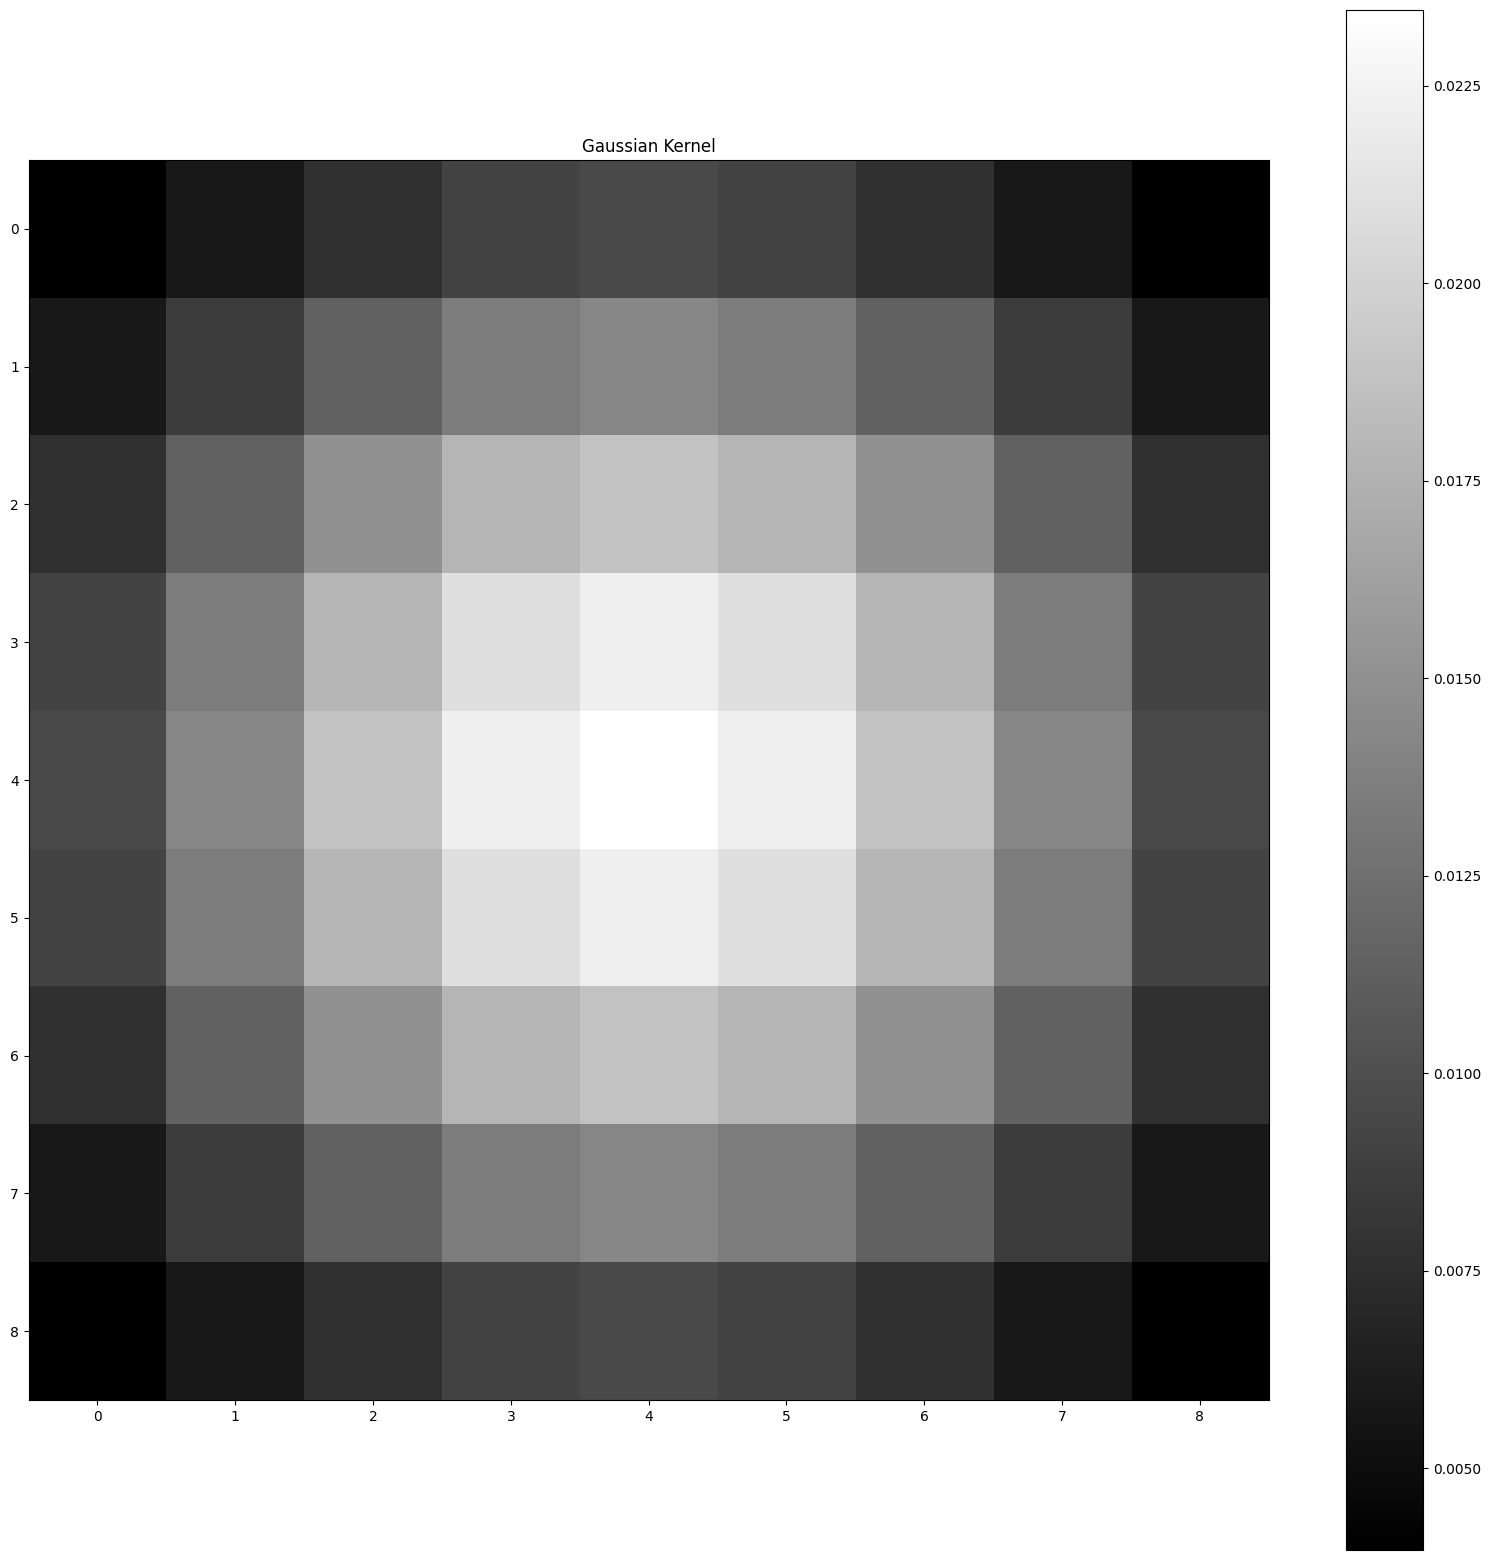

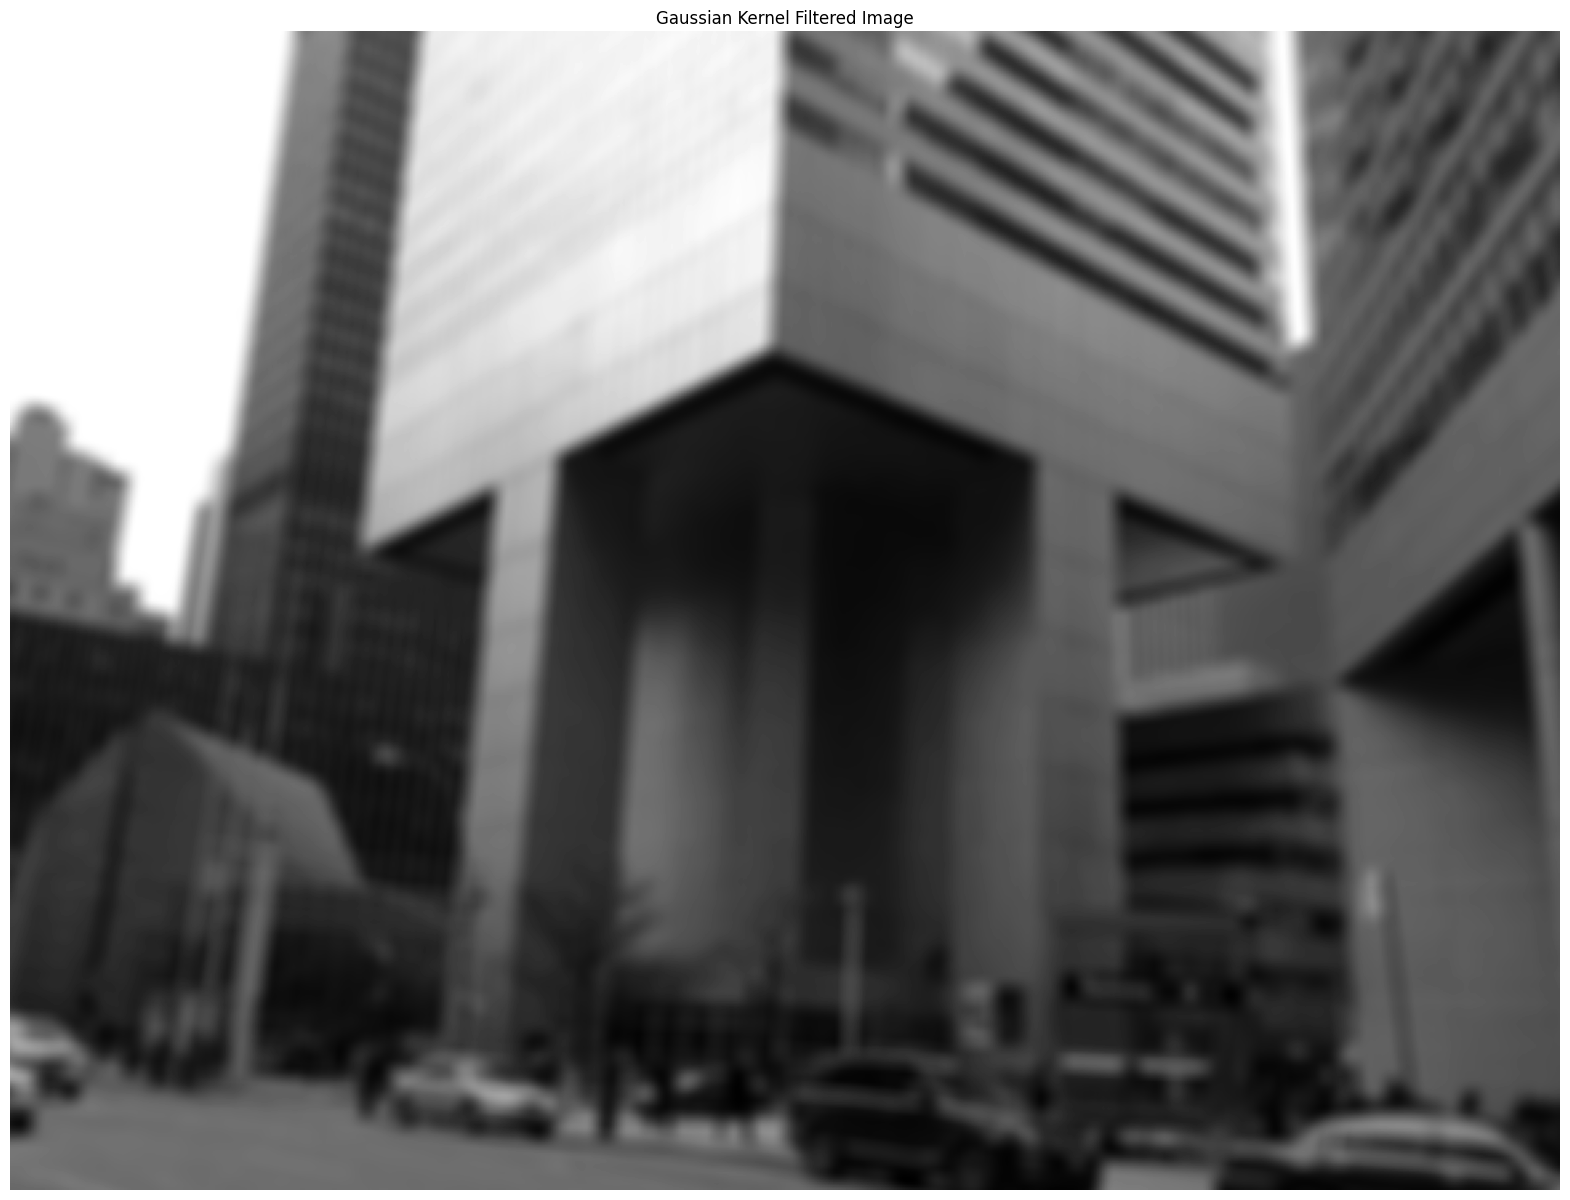

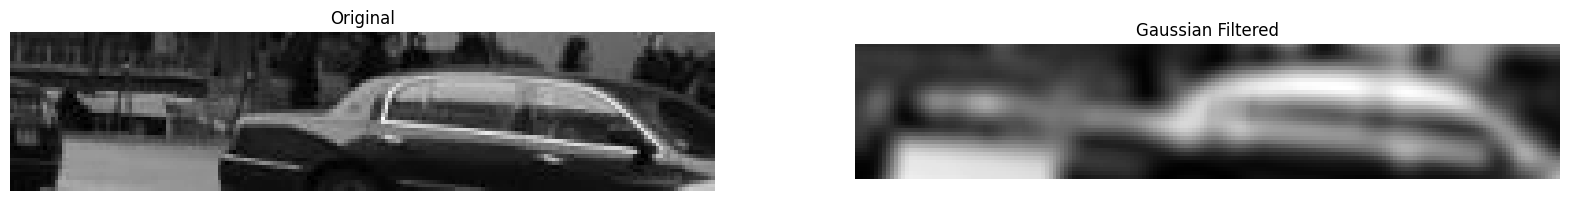

In [40]:
def make_gaussian_filter(kernel_size, sigma):
    '''This creates a square kernel_size*kernel_size Gaussian with a given sigma'''
    centered_window = (kernel_size-1)/2
    kernel_length = np.linspace(-centered_window, centered_window, kernel_size)
    gauss_1D = np.exp(-0.5*np.square(kernel_length) / np.square(sigma))
    gauss_2D = np.outer(gauss_1D, gauss_1D)
    return gauss_2D / np.sum(gauss_2D)

sigma = 3
kernel_size = int(sigma*3)
gaussian_filter = make_gaussian_filter(kernel_size, sigma)

# Plot the resulting Gaussian filter
plt.figure(figsize=figsize)
plt.imshow(gaussian_filter, cmap='gray')
plt.colorbar()
plt.title('Gaussian Kernel')
plt.show()

gaussian_result = scipy.signal.convolve2d(image, gaussian_filter, mode='valid')

# Plot the resulting output
plt.figure(figsize=figsize)
plt.imshow(gaussian_result, cmap='gray')
plt.title('Gaussian Kernel Filtered Image')
plt.axis('off')
plt.show()

# Plot the resulting output (zoomed in)
plt.figure(figsize=figsize)
plt.subplot(1,2,1)
plt.imshow(zoom_in(image), cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(zoom_in(gaussian_result), cmap=plt.cm.gray)
plt.title('Gaussian Filtered')
plt.axis('off')
plt.show()

## Prewitt Filter


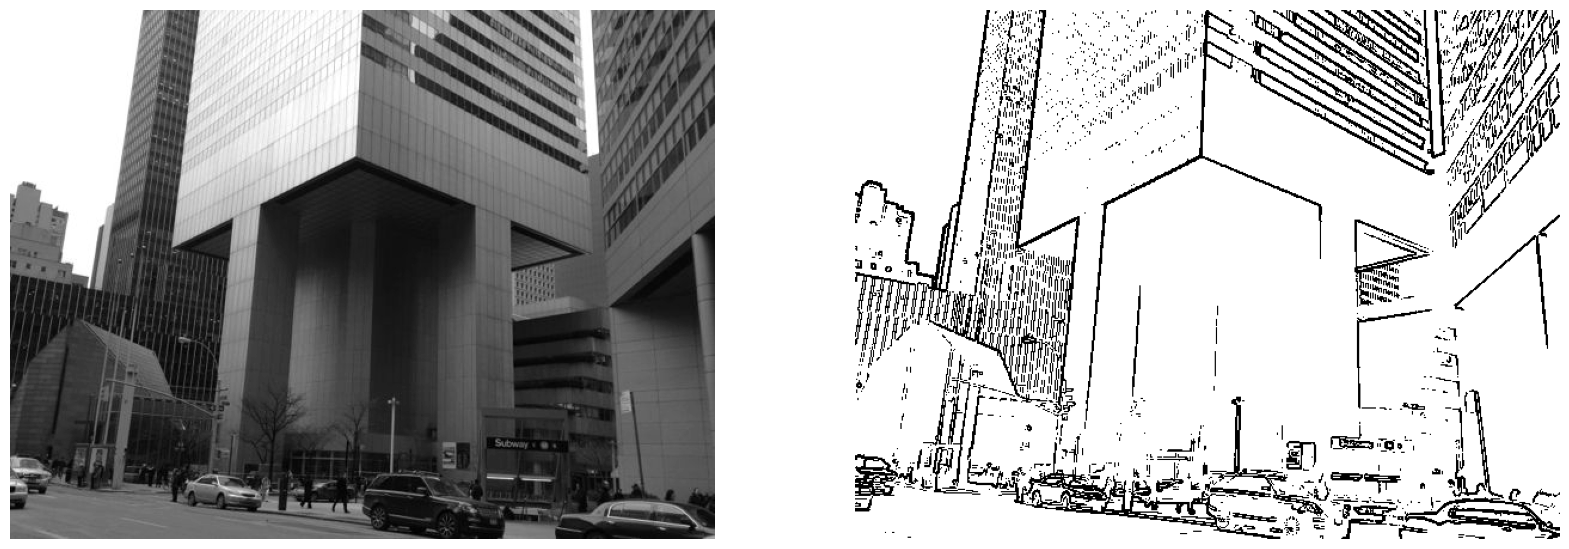

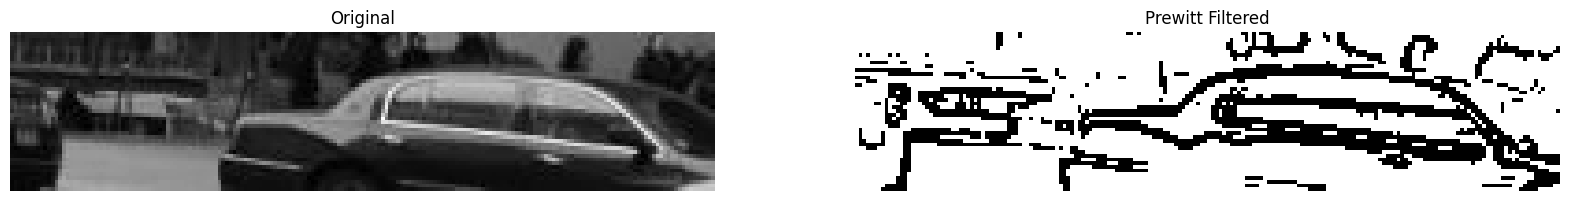

In [41]:
# Filter the image with a Prewitt filter
prewitt_result = skimage.filters.prewitt(image)

# Plot the original, the filtered image, and the thresholded result
plt.figure(figsize=figsize)
plt.subplot(1,2,1)
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(threshold(prewitt_result), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Plot the resulting output (zoomed in)
plt.figure(figsize=figsize)
plt.subplot(1,2,1)
plt.imshow(zoom_in(image), cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(zoom_in(threshold(prewitt_result)), cmap=plt.cm.gray)
plt.title('Prewitt Filtered')
plt.axis('off')
plt.show()

## Sobel Filter

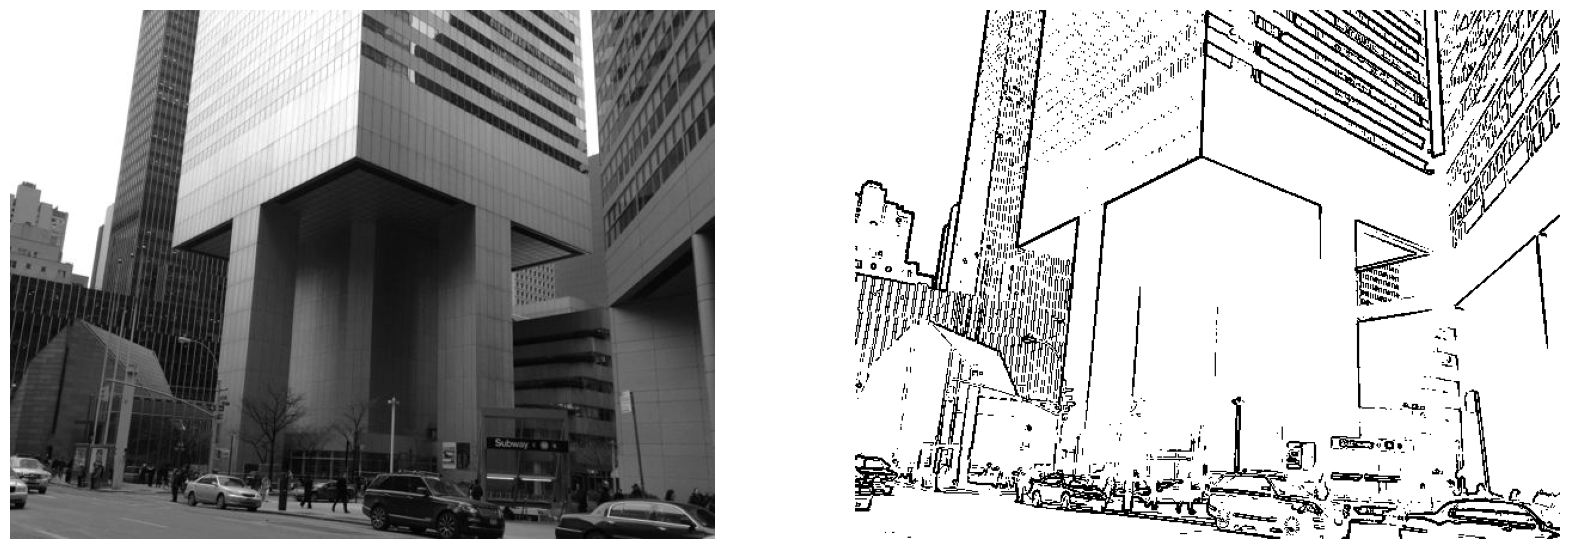

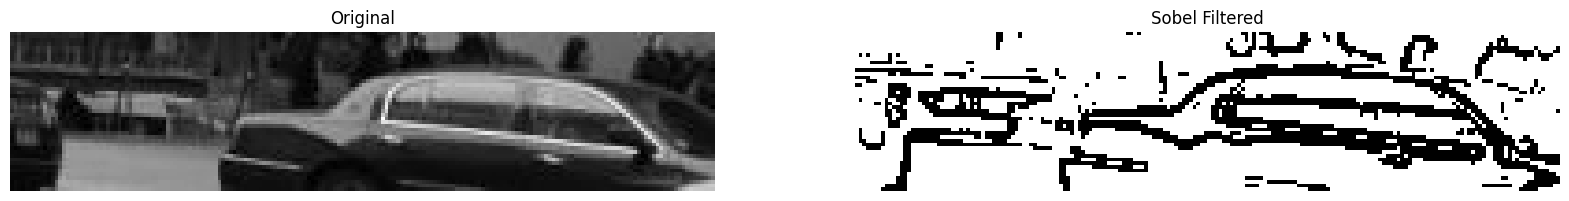

In [42]:
# Filter the image with a Sobel filter
sobel_result = skimage.filters.sobel(image)

# Plot the original, the filtered image, and the thresholded result
plt.figure(figsize=figsize)
plt.subplot(1,2,1)
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(threshold(sobel_result), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Plot the resulting output (zoomed in)
plt.figure(figsize=figsize)
plt.subplot(1,2,1)
plt.imshow(zoom_in(image), cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(zoom_in(threshold(sobel_result)), cmap=plt.cm.gray)
plt.title('Sobel Filtered')
plt.axis('off')
plt.show()

## Compare the difference between the outputs

Here we perform the XOR between the two outputs of Sobel and Prewitt filtering. This should help highlight the different between the two methods.

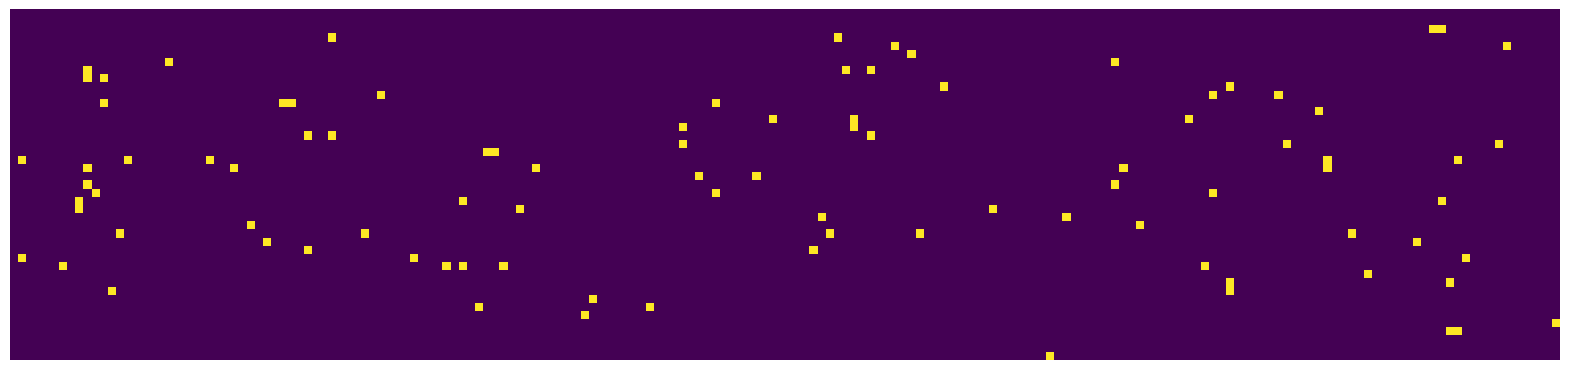

In [43]:
# Calculate difference between the two filtered images.
thresholded_sobel = threshold(sobel_result)
thresholded_prewitt = threshold(prewitt_result)
difference = thresholded_sobel ^ thresholded_prewitt
    
# Plot the resulting output (zoomed in)
plt.figure(figsize=figsize)
plt.imshow(difference)
plt.axis('off')
plt.show()

plt.figure(figsize=figsize)
plt.imshow(zoom_in(difference))
plt.axis('off')
plt.show()

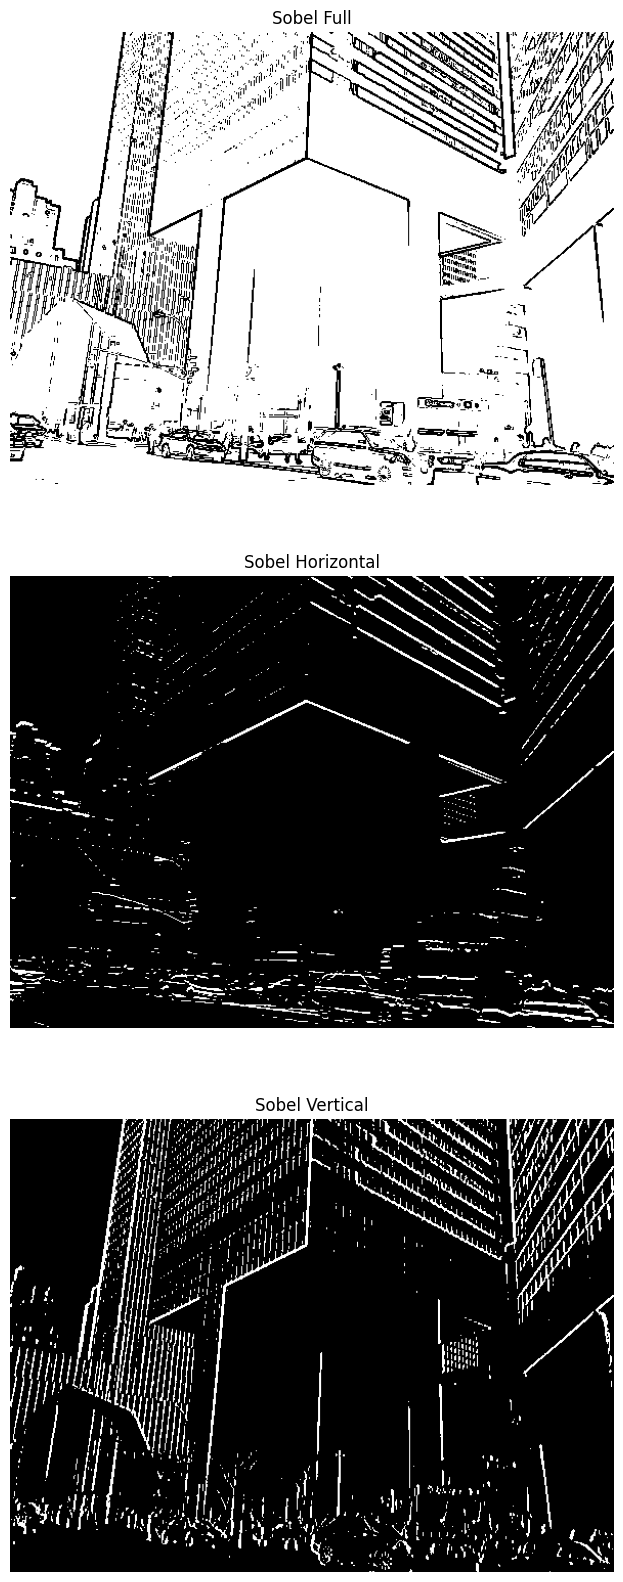

In [44]:
# Try the horizontal and vertical Sobel's seperately
image_sobel = skimage.filters.sobel(image)
image_sobel_h = skimage.filters.sobel_h(image)
image_sobel_v = skimage.filters.sobel_v(image)

# Plot the original, the filtered image, and the thresholded result
plt.figure(figsize=figsize)
plt.subplot(3,1,1)
plt.imshow(threshold(image_sobel), cmap=plt.cm.gray)
plt.title('Sobel Full')
plt.axis('off')
plt.subplot(3,1,2)
plt.imshow(threshold(image_sobel_h) , cmap=plt.cm.gray)
plt.title('Sobel Horizontal')
plt.axis('off')
plt.subplot(3,1,3)
plt.imshow(threshold(image_sobel_v), cmap=plt.cm.gray)
plt.title('Sobel Vertical')
plt.axis('off')
plt.show()

## Laplace Filter

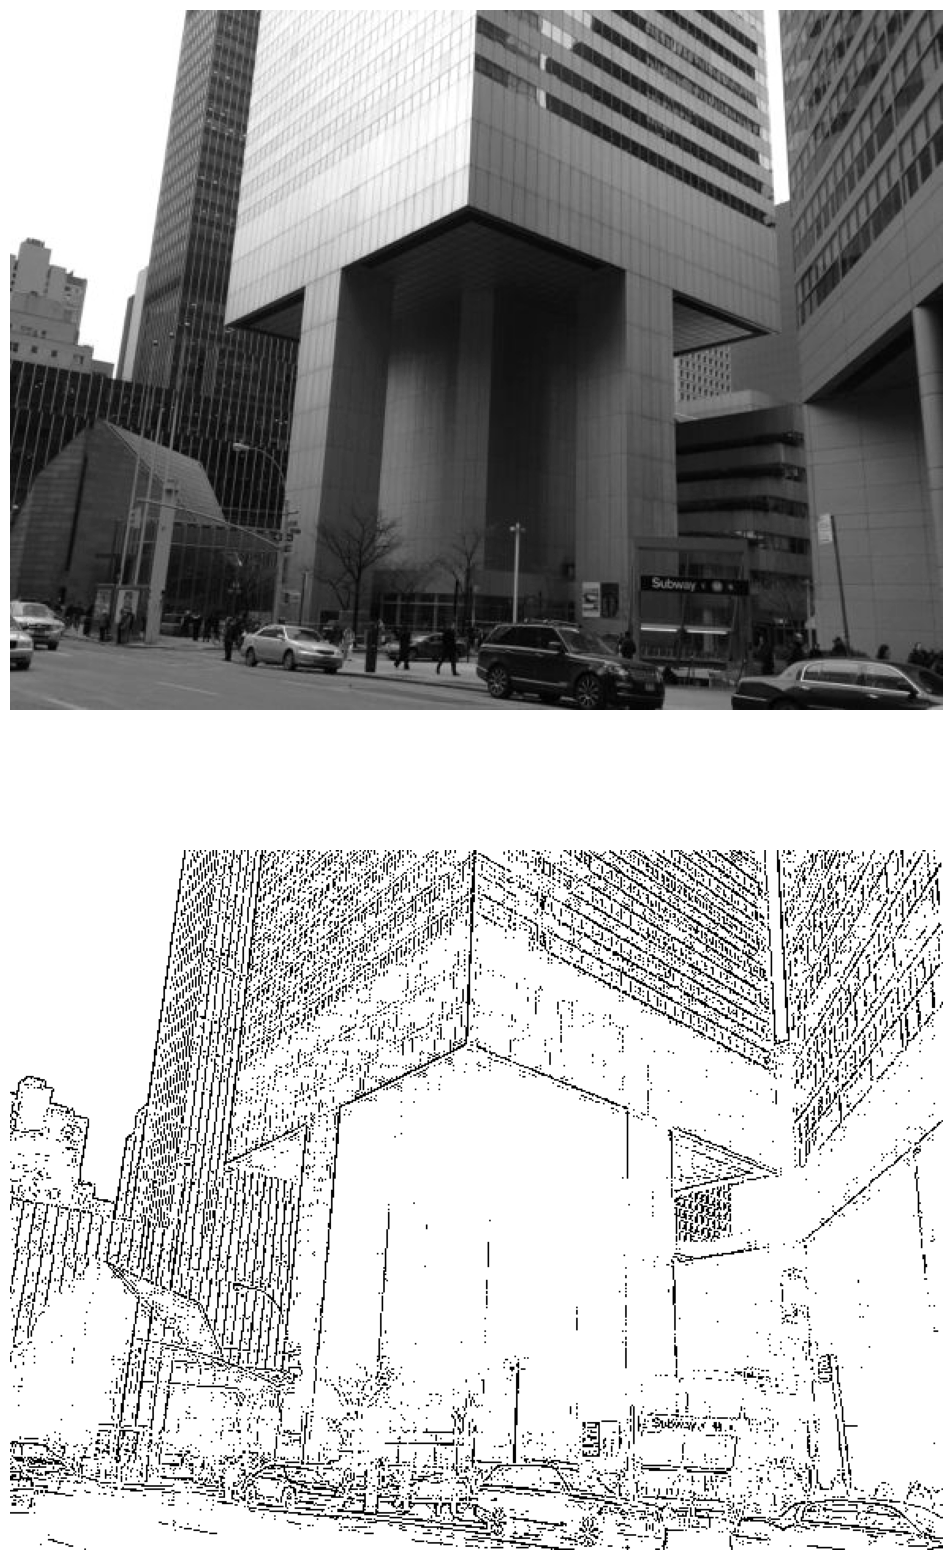

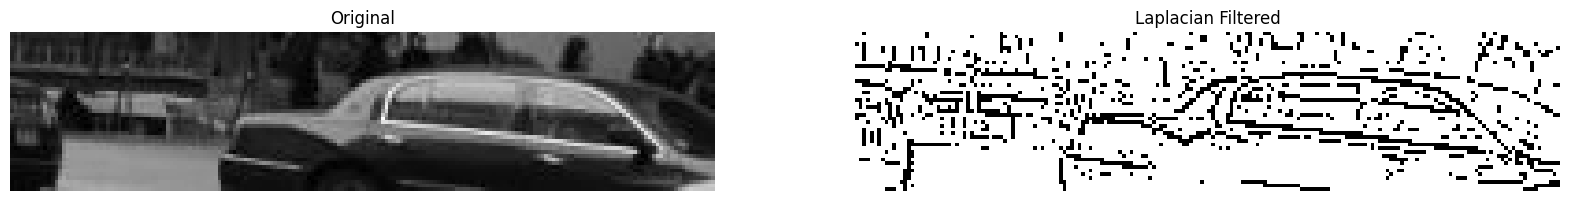

In [45]:
# Filter the image with a Laplace filter
laplacian_result = skimage.filters.laplace(image, ksize=5)

# Plot the original, the filtered image, and the thresholded result
plt.figure(figsize=figsize)
plt.subplot(2,1,1)
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(threshold(laplacian_result), cmap=plt.cm.gray)
plt.axis('off')

# Plot the resulting output (zoomed in)
plt.figure(figsize=figsize)
plt.subplot(1,2,1)
plt.imshow(zoom_in(image), cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(zoom_in(threshold(laplacian_result)), cmap=plt.cm.gray)
plt.title('Laplacian Filtered')
plt.axis('off')
plt.show()

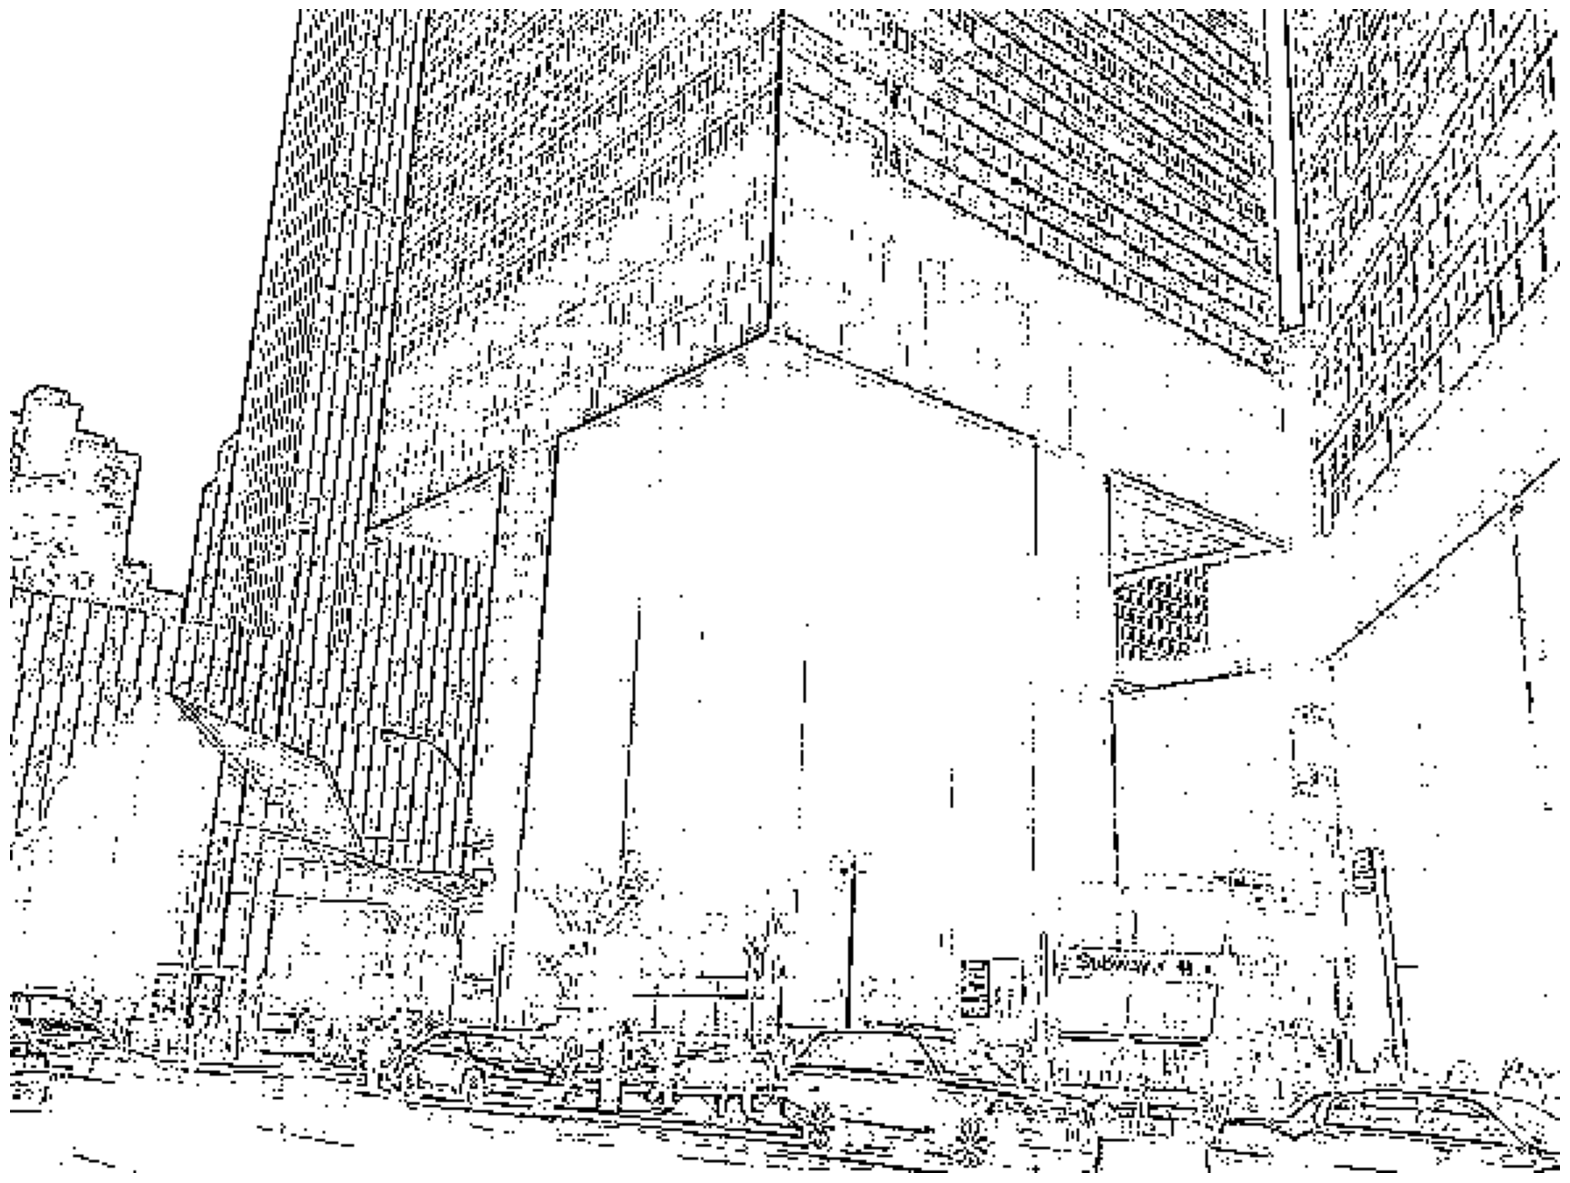

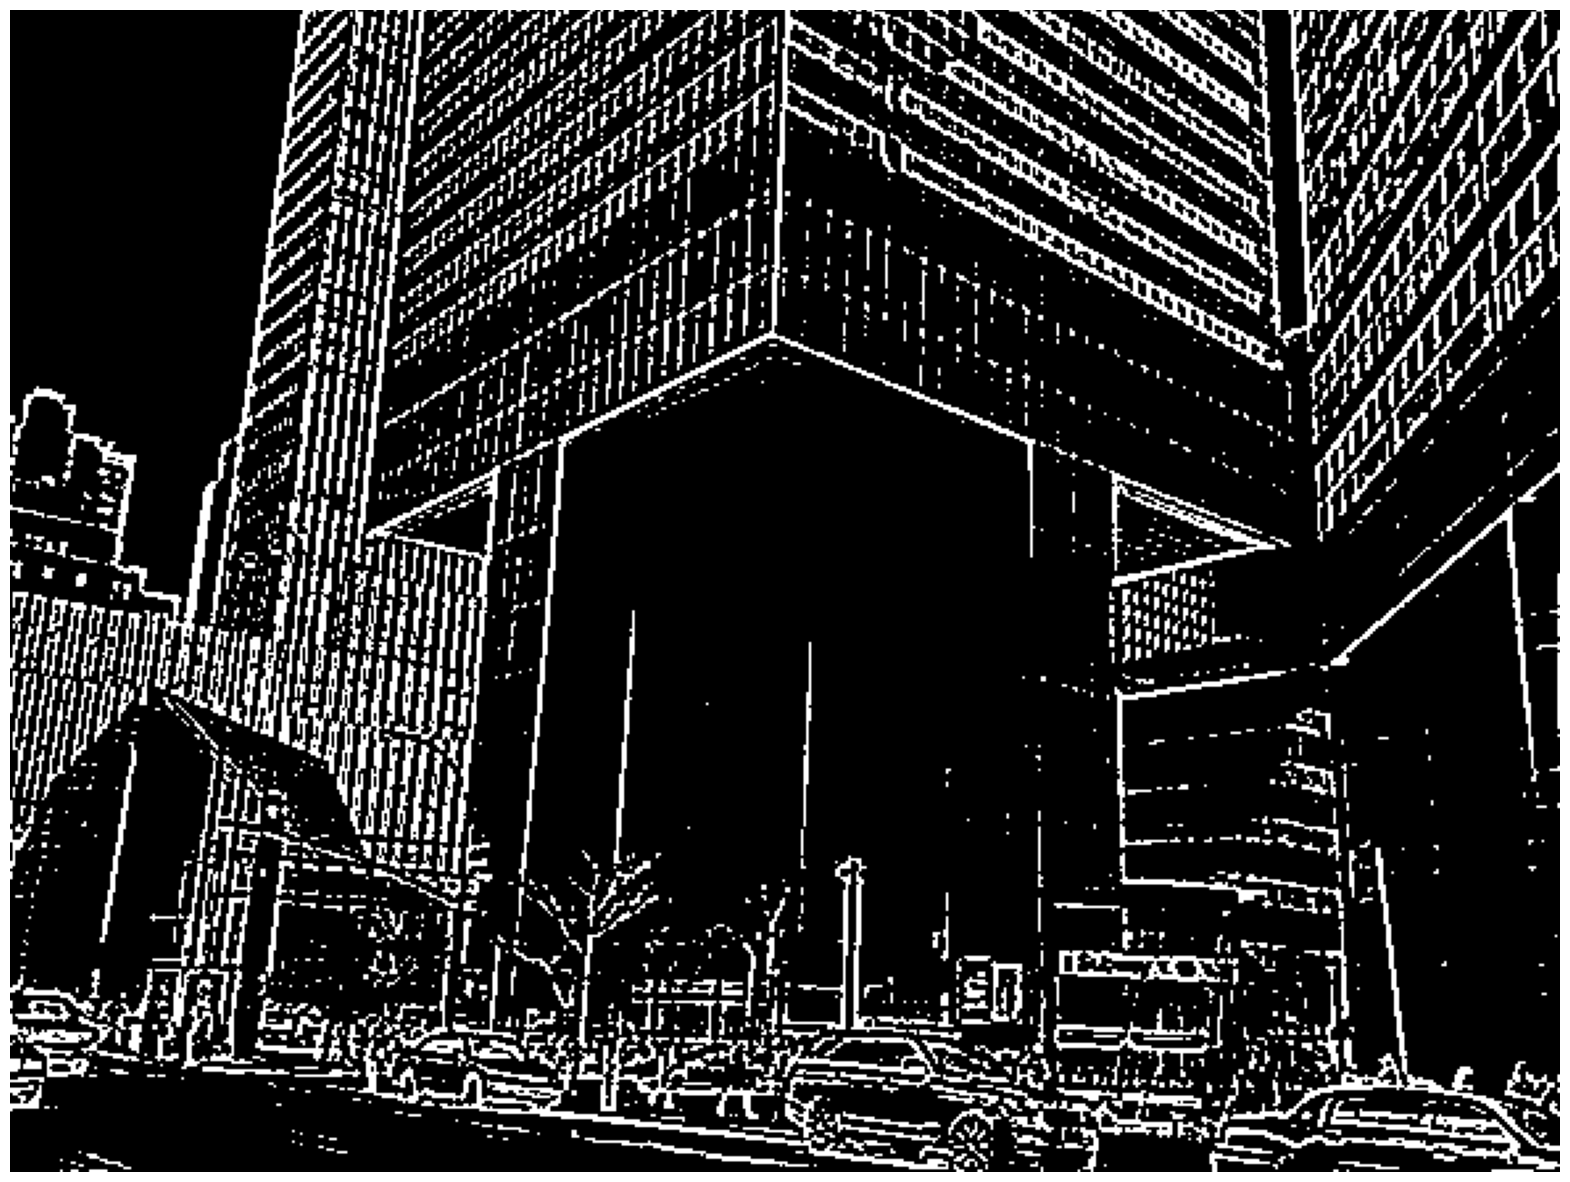

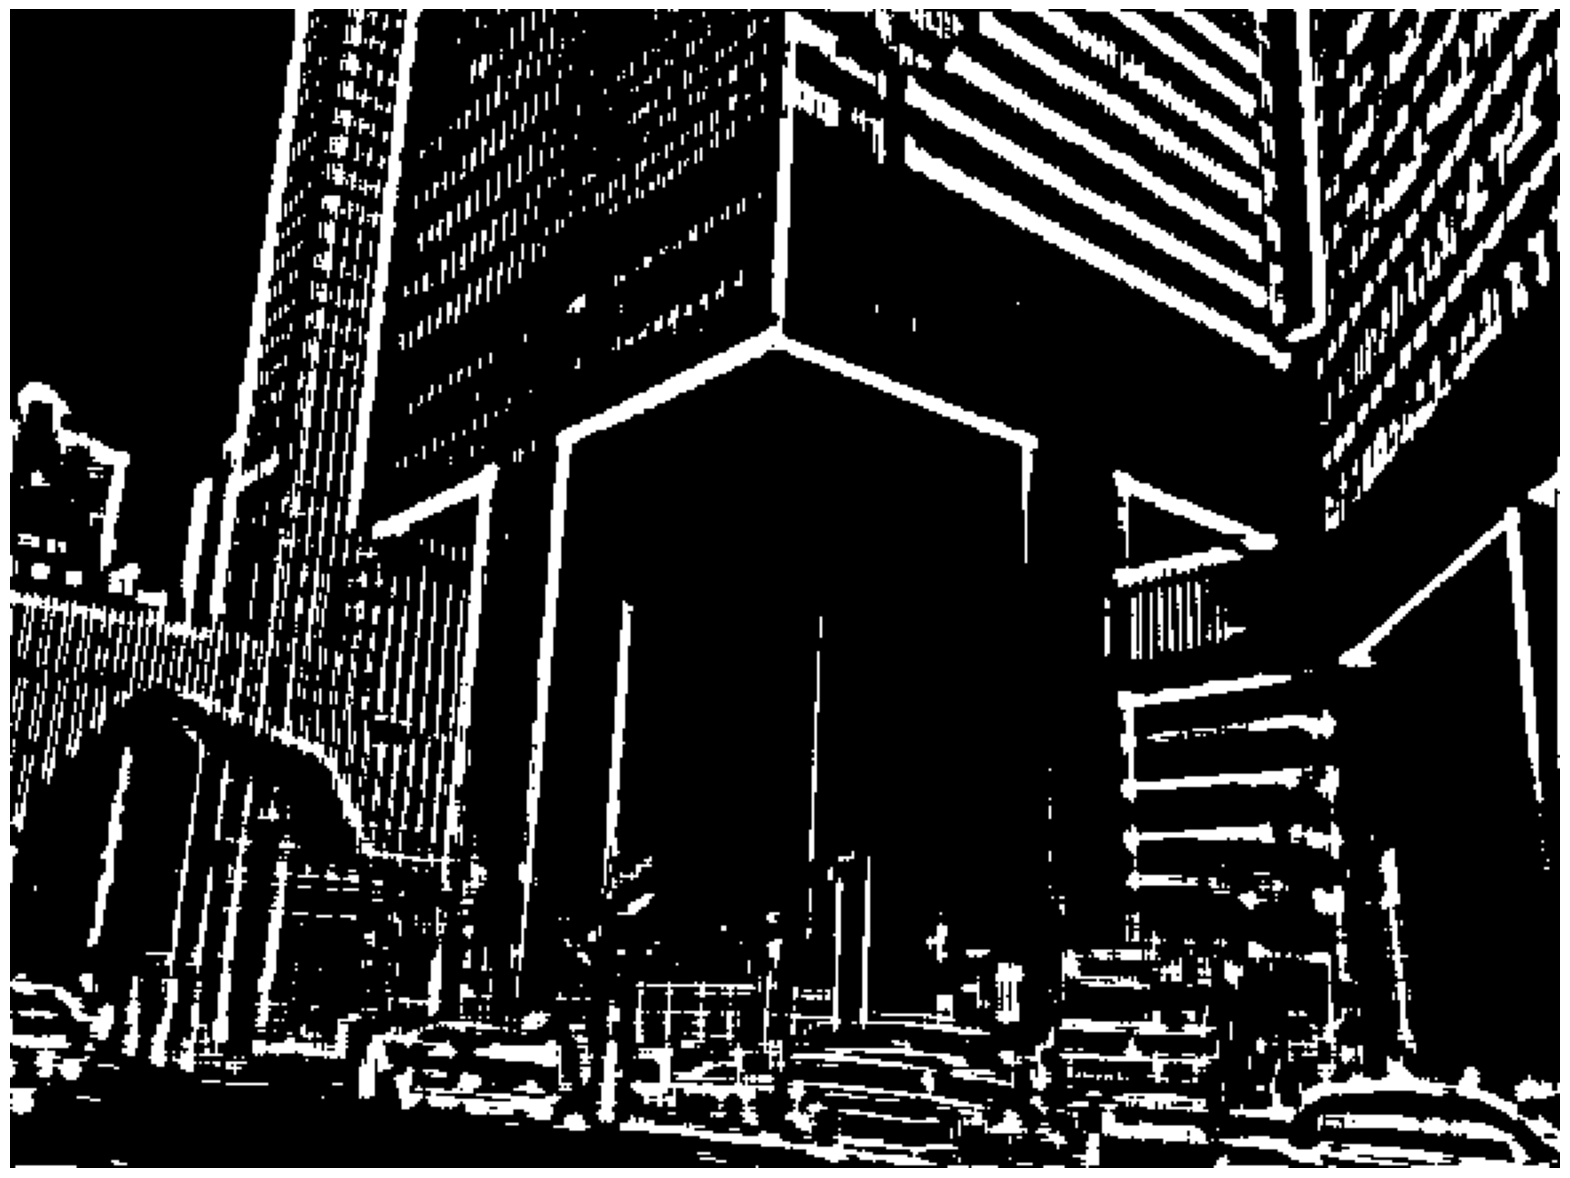

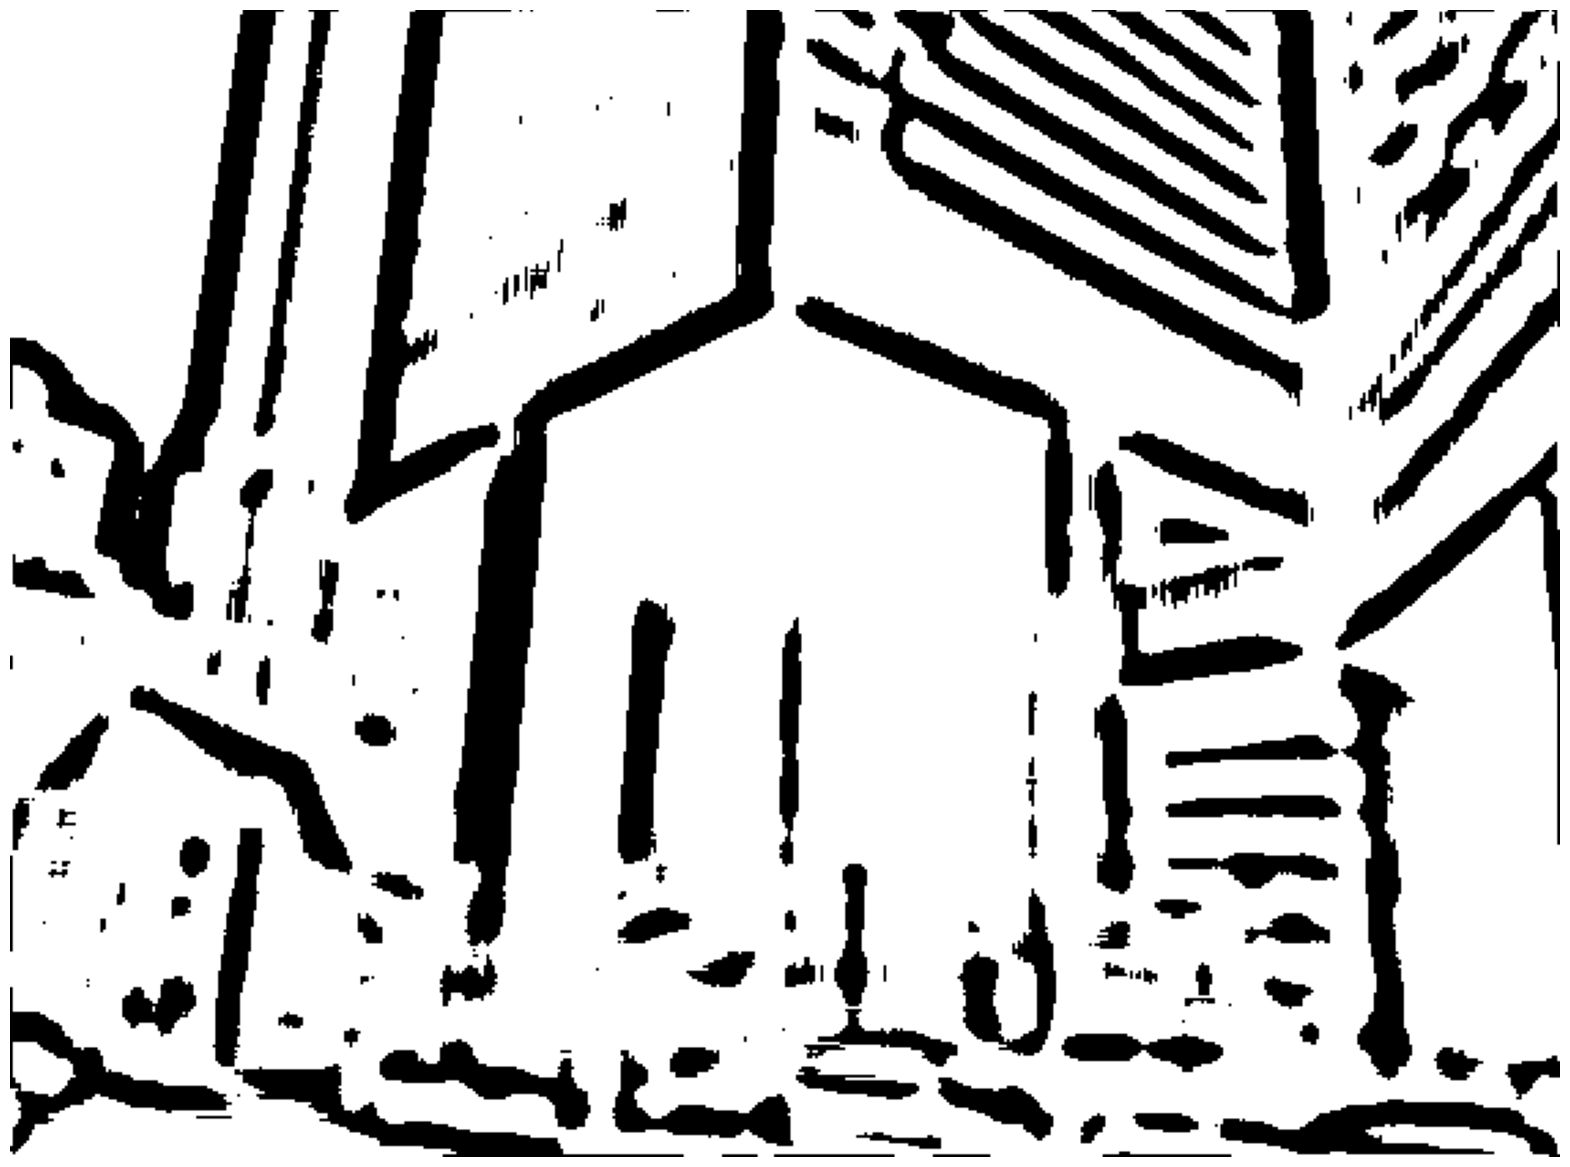

In [46]:
# Filter the image with a Laplace filter
laplacian_result = skimage.filters.laplace(image, ksize=3)
plt.figure(figsize=figsize)
plt.imshow(threshold(laplacian_result), cmap=plt.cm.gray)
plt.axis('off')
plt.show()


# Small Gaussian Sigma
sigma = 1
kernel_size = int(sigma*3)
gaussian_result = scipy.signal.convolve2d(image, make_gaussian_filter(kernel_size, sigma), mode='valid')
laplacian_result = skimage.filters.laplace(gaussian_result, ksize=3)
plt.figure(figsize=figsize)
plt.imshow(threshold(laplacian_result), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Larger Gaussian Sigma
sigma = 3
kernel_size = int(sigma*3)
gaussian_result = scipy.signal.convolve2d(image, make_gaussian_filter(kernel_size, sigma), mode='valid')
laplacian_result = skimage.filters.laplace(gaussian_result, ksize=3)
plt.figure(figsize=figsize)
plt.imshow(threshold(laplacian_result), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Large Gaussian Sigma and wider kernel
sigma = 5
kernel_size = int(sigma*5)
gaussian_result = scipy.signal.convolve2d(image, make_gaussian_filter(kernel_size, sigma), mode='valid')
laplacian_result = skimage.filters.laplace(gaussian_result, ksize=3)
plt.figure(figsize=figsize)
plt.imshow(threshold(laplacian_result), cmap=plt.cm.gray)
plt.axis('off')
plt.show()


## Direct comparisons
Here we compare the zoomed regions of the different filtering operations.

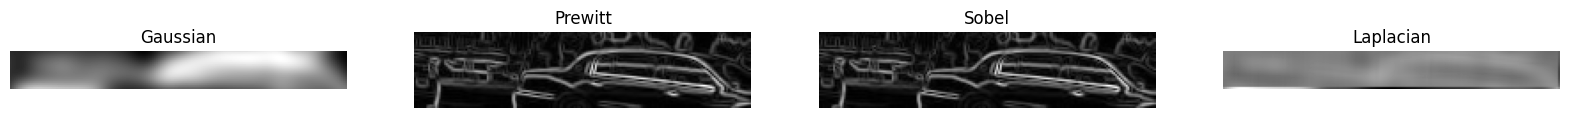

In [47]:
# Plot the results (zoomed in)
plt.figure(figsize=figsize)
plt.subplot(1,4,1)
plt.imshow(zoom_in(gaussian_result), cmap=plt.cm.gray)
plt.title('Gaussian')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(zoom_in(prewitt_result), cmap=plt.cm.gray)
plt.title('Prewitt')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(zoom_in(sobel_result), cmap=plt.cm.gray)
plt.title('Sobel')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(zoom_in(laplacian_result), cmap=plt.cm.gray)
plt.title('Laplacian')
plt.axis('off')
plt.show()

# Haar Cascades
The following looks at Haar features and their use in tracking of human faces by use of a cascade classifier. 

In [48]:
# Load video in
video = cv2.VideoCapture('face.mp4')

# Create Haar cascade detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Loop over frames in the video and apply cascade detector
frames = []
n_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
for i_frame in range(n_frames):
    if not i_frame % 10:
        print(f'Processing frame {i_frame} of {n_frames}')
    
    # Get frame and convert to grayscale
    ret, frame = video.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
       
    # Detect faces using the cascade
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # For each detected face, annotate the bounding box onto the frame and then try to find the eyes.
    for (x,y,w,h) in faces:
        # Draw the bounding box onto the frame
        img = cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
        
        # Crop to the detected face, to speed up searching for the eyes
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        # Detect eyes in the face using the eye cascade
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # Draw the bounding box onto the frame
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0), 2)
            
    # Add frame to our list of annotated frames
    frames.append(frame)
    
# View result
for i_frame in frames:
    # Render the frame
    cv2.imshow('img',i_frame)
    cv2.waitKey(30)

# Close everything once finished
video.release()
cv2.destroyAllWindows()

Processing frame 0 of 262
Processing frame 10 of 262
Processing frame 20 of 262
Processing frame 30 of 262
Processing frame 40 of 262
Processing frame 50 of 262
Processing frame 60 of 262
Processing frame 70 of 262
Processing frame 80 of 262
Processing frame 90 of 262
Processing frame 100 of 262
Processing frame 110 of 262
Processing frame 120 of 262
Processing frame 130 of 262
Processing frame 140 of 262
Processing frame 150 of 262
Processing frame 160 of 262
Processing frame 170 of 262
Processing frame 180 of 262
Processing frame 190 of 262
Processing frame 200 of 262
Processing frame 210 of 262
Processing frame 220 of 262
Processing frame 230 of 262
Processing frame 240 of 262
Processing frame 250 of 262
Processing frame 260 of 262


The following looks at Haar features and their use in tracking of human bodies by use of a cascade classifier. 

In [49]:
# Load video in
video = cv2.VideoCapture('human.mp4')

# Create Haar cascade detector
body_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

# Loop over frames in the video and apply cascade detector
frames = []
n_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
for i_frame in range(n_frames):
    if not i_frame % 10:
        print(f'Processing frame {i_frame} of {n_frames}')
    
    # Get frame and convert to grayscale
    ret, frame = video.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
       
    # Detect bodies using the cascade
    bodies = body_cascade.detectMultiScale(gray)
    
    # Draw the bounding box onto the frame
    for (x,y,w,h) in bodies:
        img = cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
    # Add frame to our list of annotated frames
    frames.append(frame)
    
# View result
for i_frame in frames:
    # Render the frame
    cv2.imshow('img', i_frame)
    cv2.waitKey(30)

# Close everything once finished
video.release()
cv2.destroyAllWindows()

Processing frame 0 of 1000
Processing frame 10 of 1000
Processing frame 20 of 1000
Processing frame 30 of 1000
Processing frame 40 of 1000
Processing frame 50 of 1000
Processing frame 60 of 1000
Processing frame 70 of 1000
Processing frame 80 of 1000
Processing frame 90 of 1000
Processing frame 100 of 1000
Processing frame 110 of 1000
Processing frame 120 of 1000
Processing frame 130 of 1000
Processing frame 140 of 1000
Processing frame 150 of 1000
Processing frame 160 of 1000
Processing frame 170 of 1000
Processing frame 180 of 1000
Processing frame 190 of 1000
Processing frame 200 of 1000
Processing frame 210 of 1000
Processing frame 220 of 1000
Processing frame 230 of 1000
Processing frame 240 of 1000
Processing frame 250 of 1000
Processing frame 260 of 1000
Processing frame 270 of 1000
Processing frame 280 of 1000
Processing frame 290 of 1000
Processing frame 300 of 1000
Processing frame 310 of 1000
Processing frame 320 of 1000
Processing frame 330 of 1000
Processing frame 340 of 1

# HoG Features
The following utilises the Histogram of Gradients feature extractor on the given image. We can then look at varying the hyperparameters to observe the impact on retained details.

C:\Users\ademp\AppData\Local\Temp\ipykernel_14704\3212987984.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('vase.jpg')


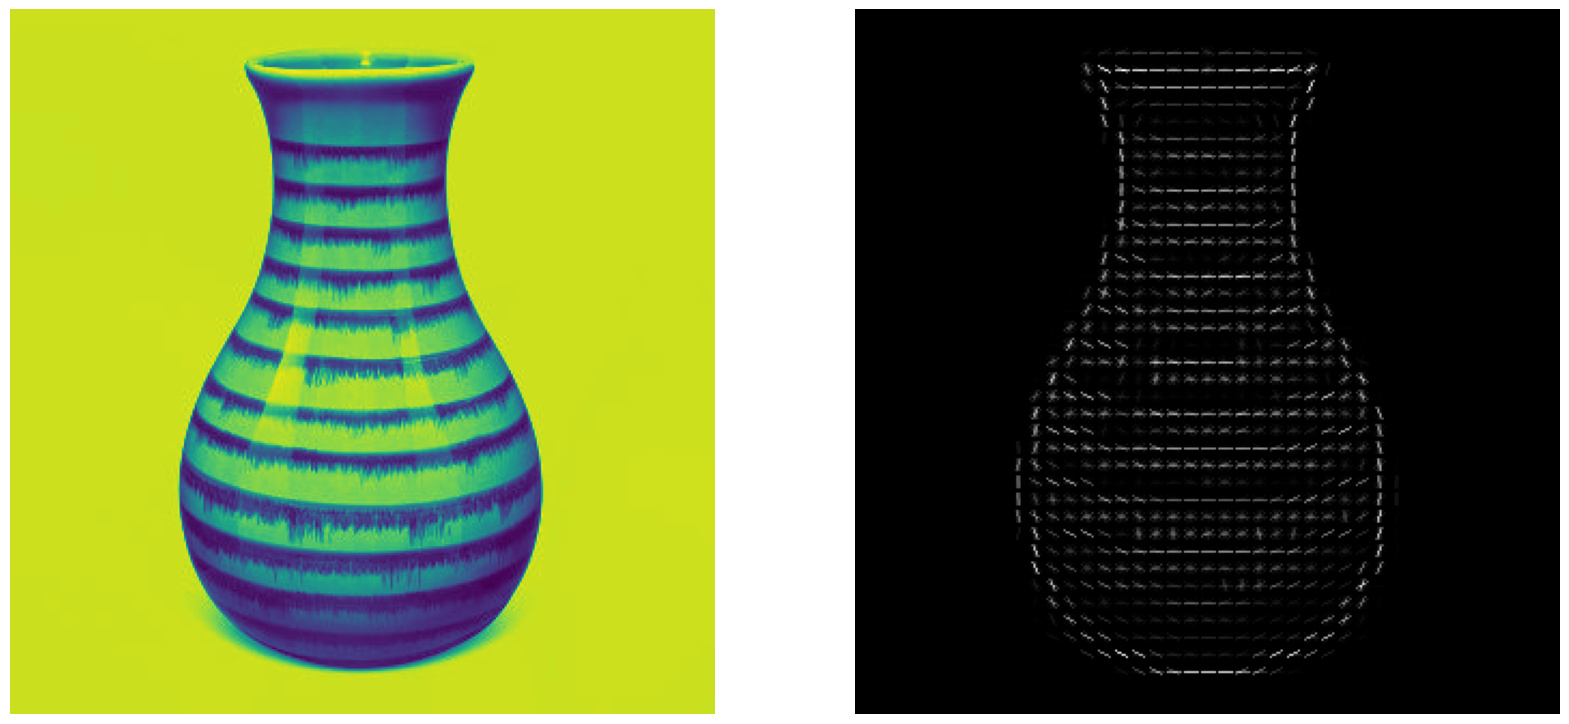

In [53]:
# Load in a smaller image for this example
image = imageio.imread('vase.jpg')
image = skimage.color.rgb2gray(image)

# Extract HoG features and obtain both the vector and the HoG visualization image
hog, hogvis = skimage.feature.hog(image, visualize=True)

# Plot the original and the HoG rose plots
plt.figure(figsize=figsize)
plt.subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(hogvis, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

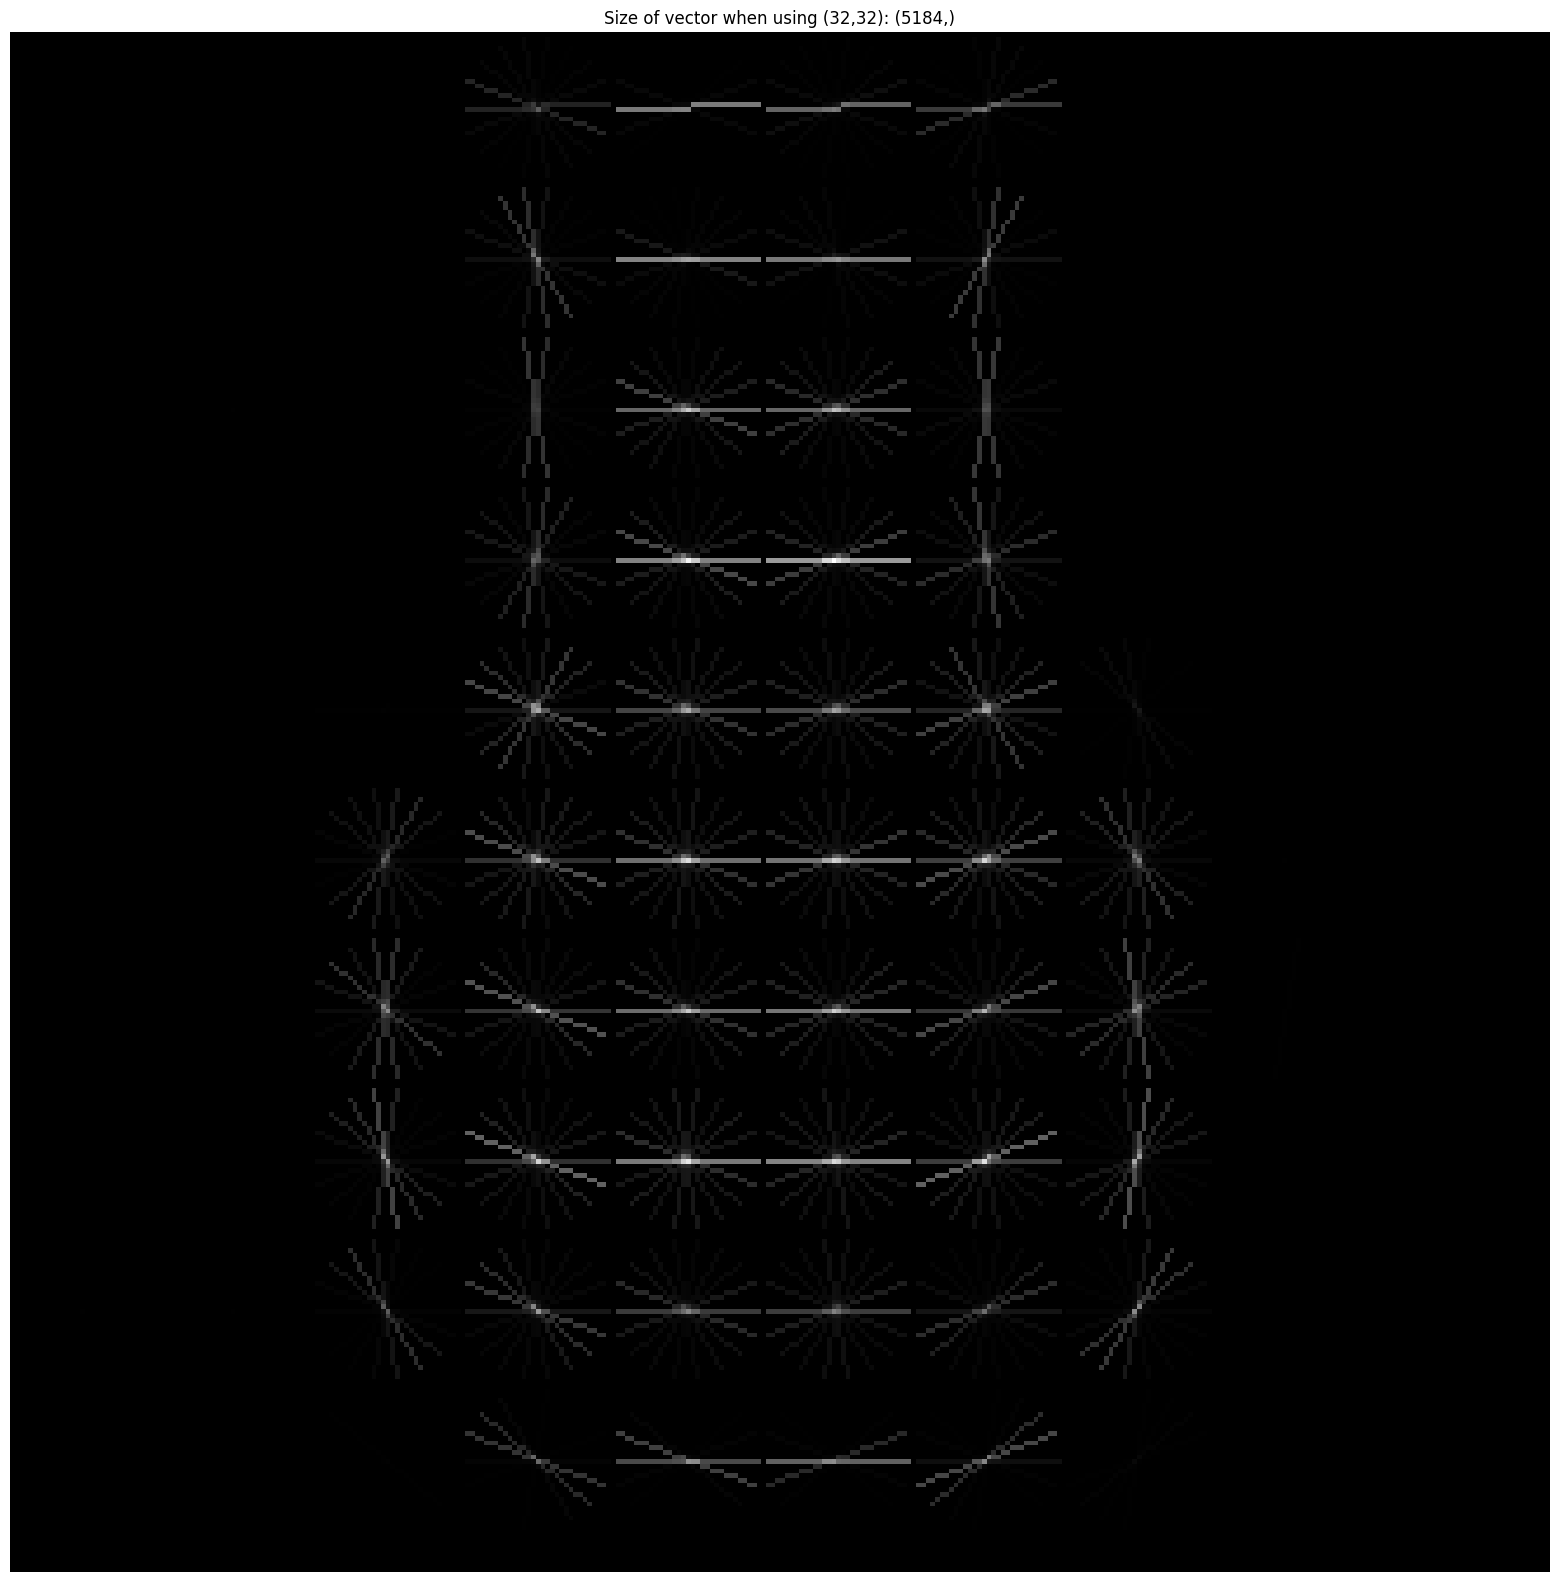

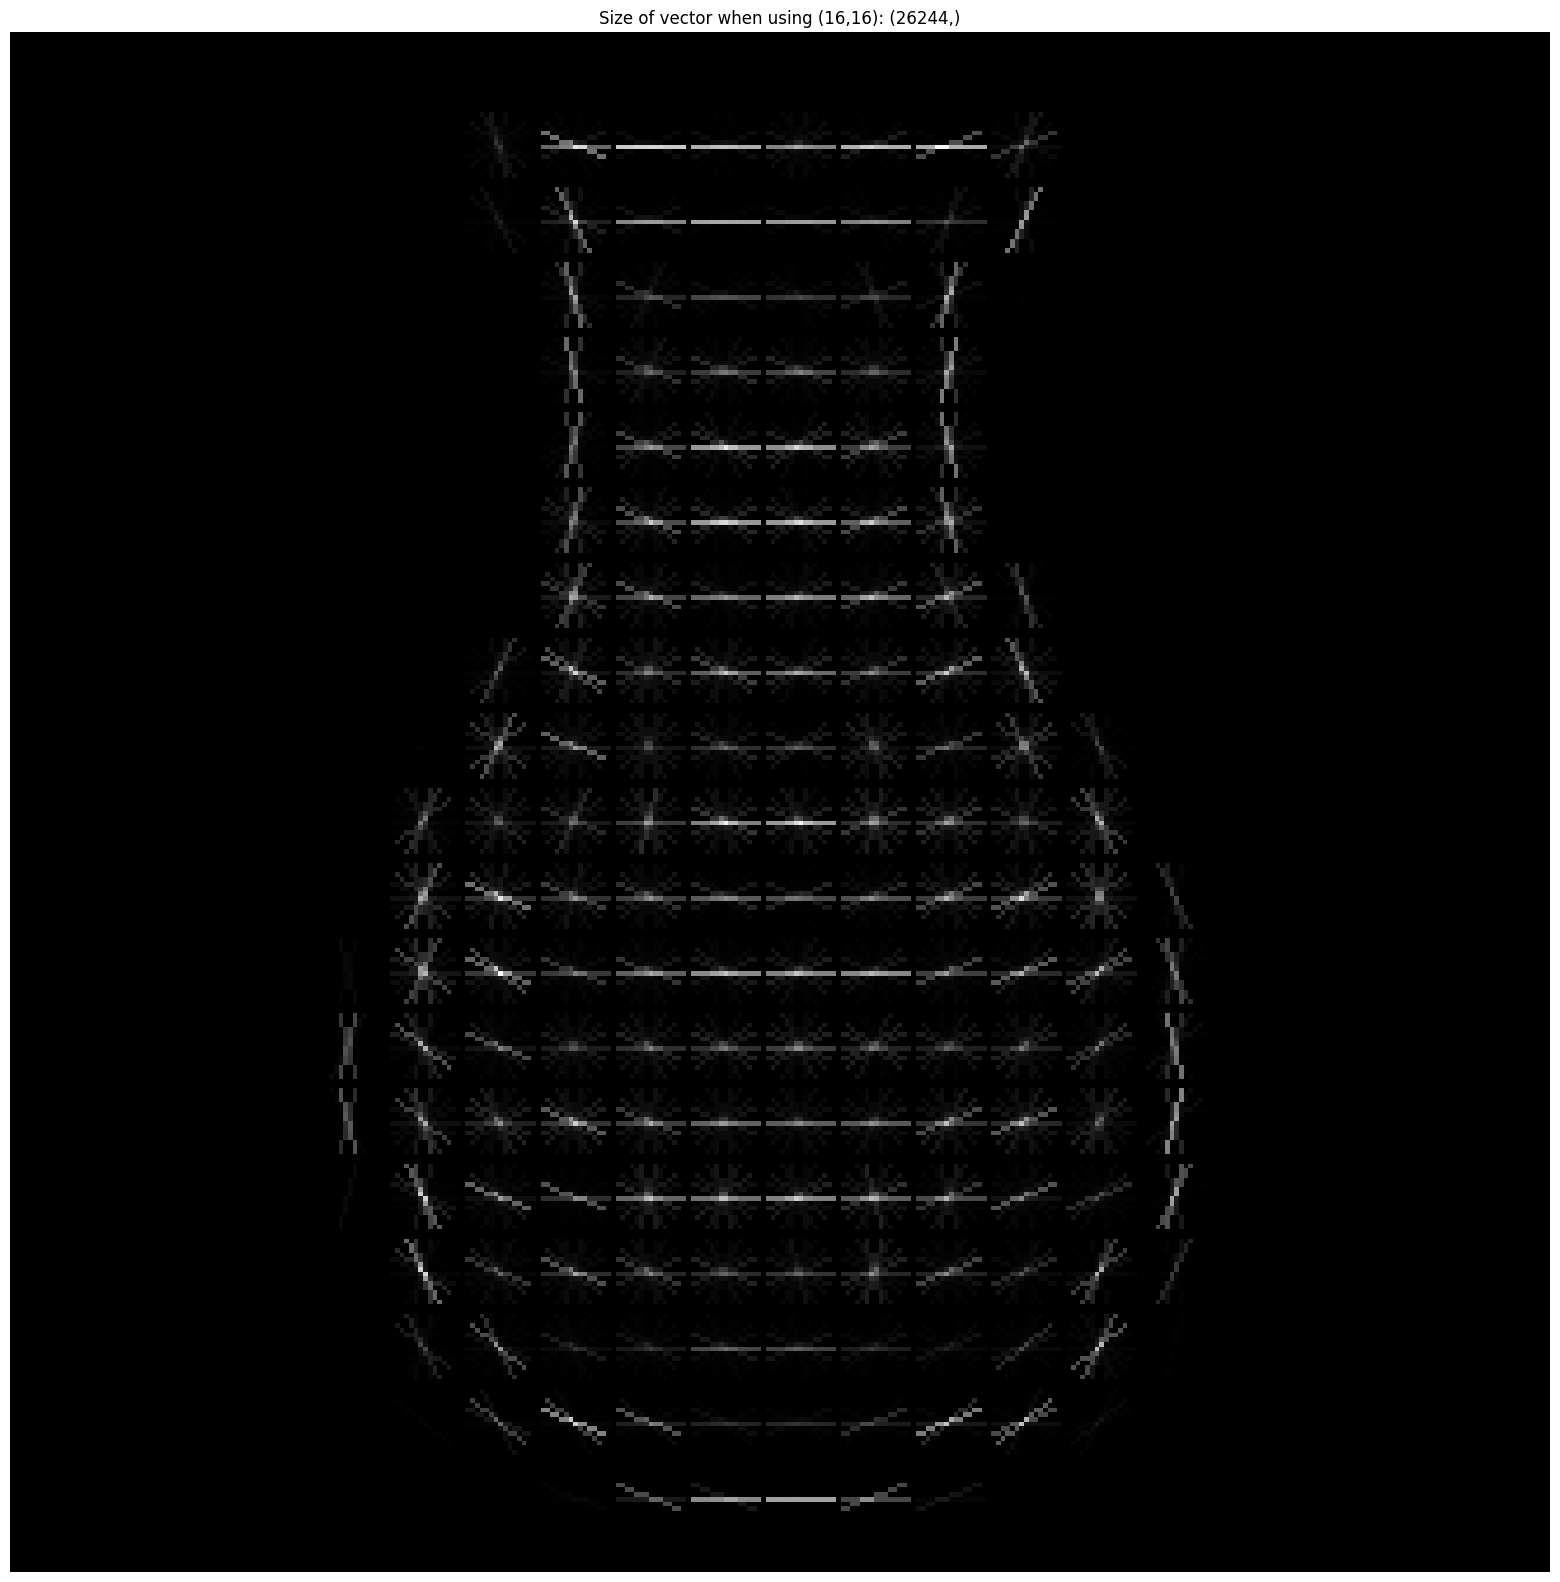

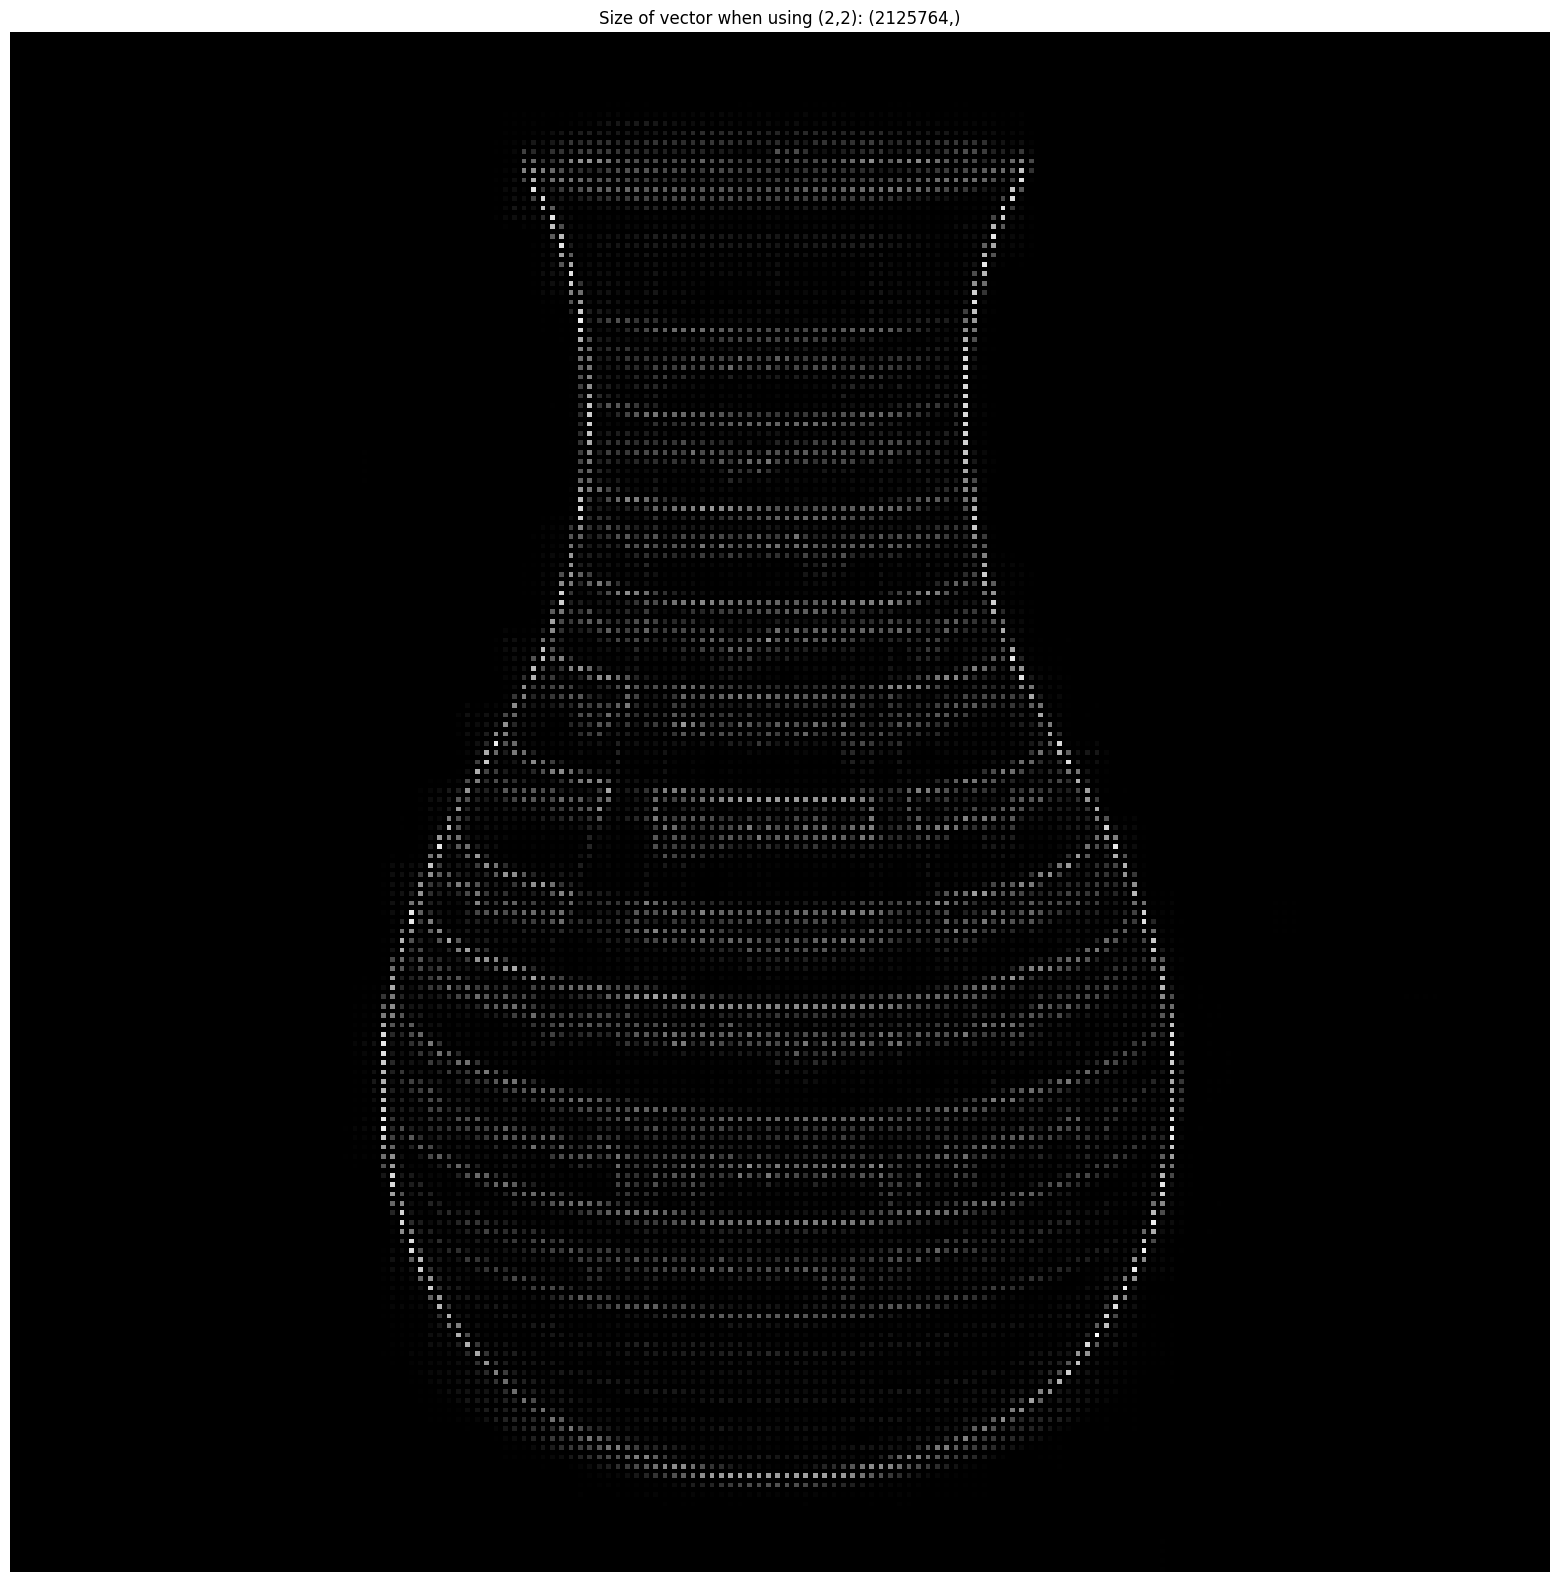

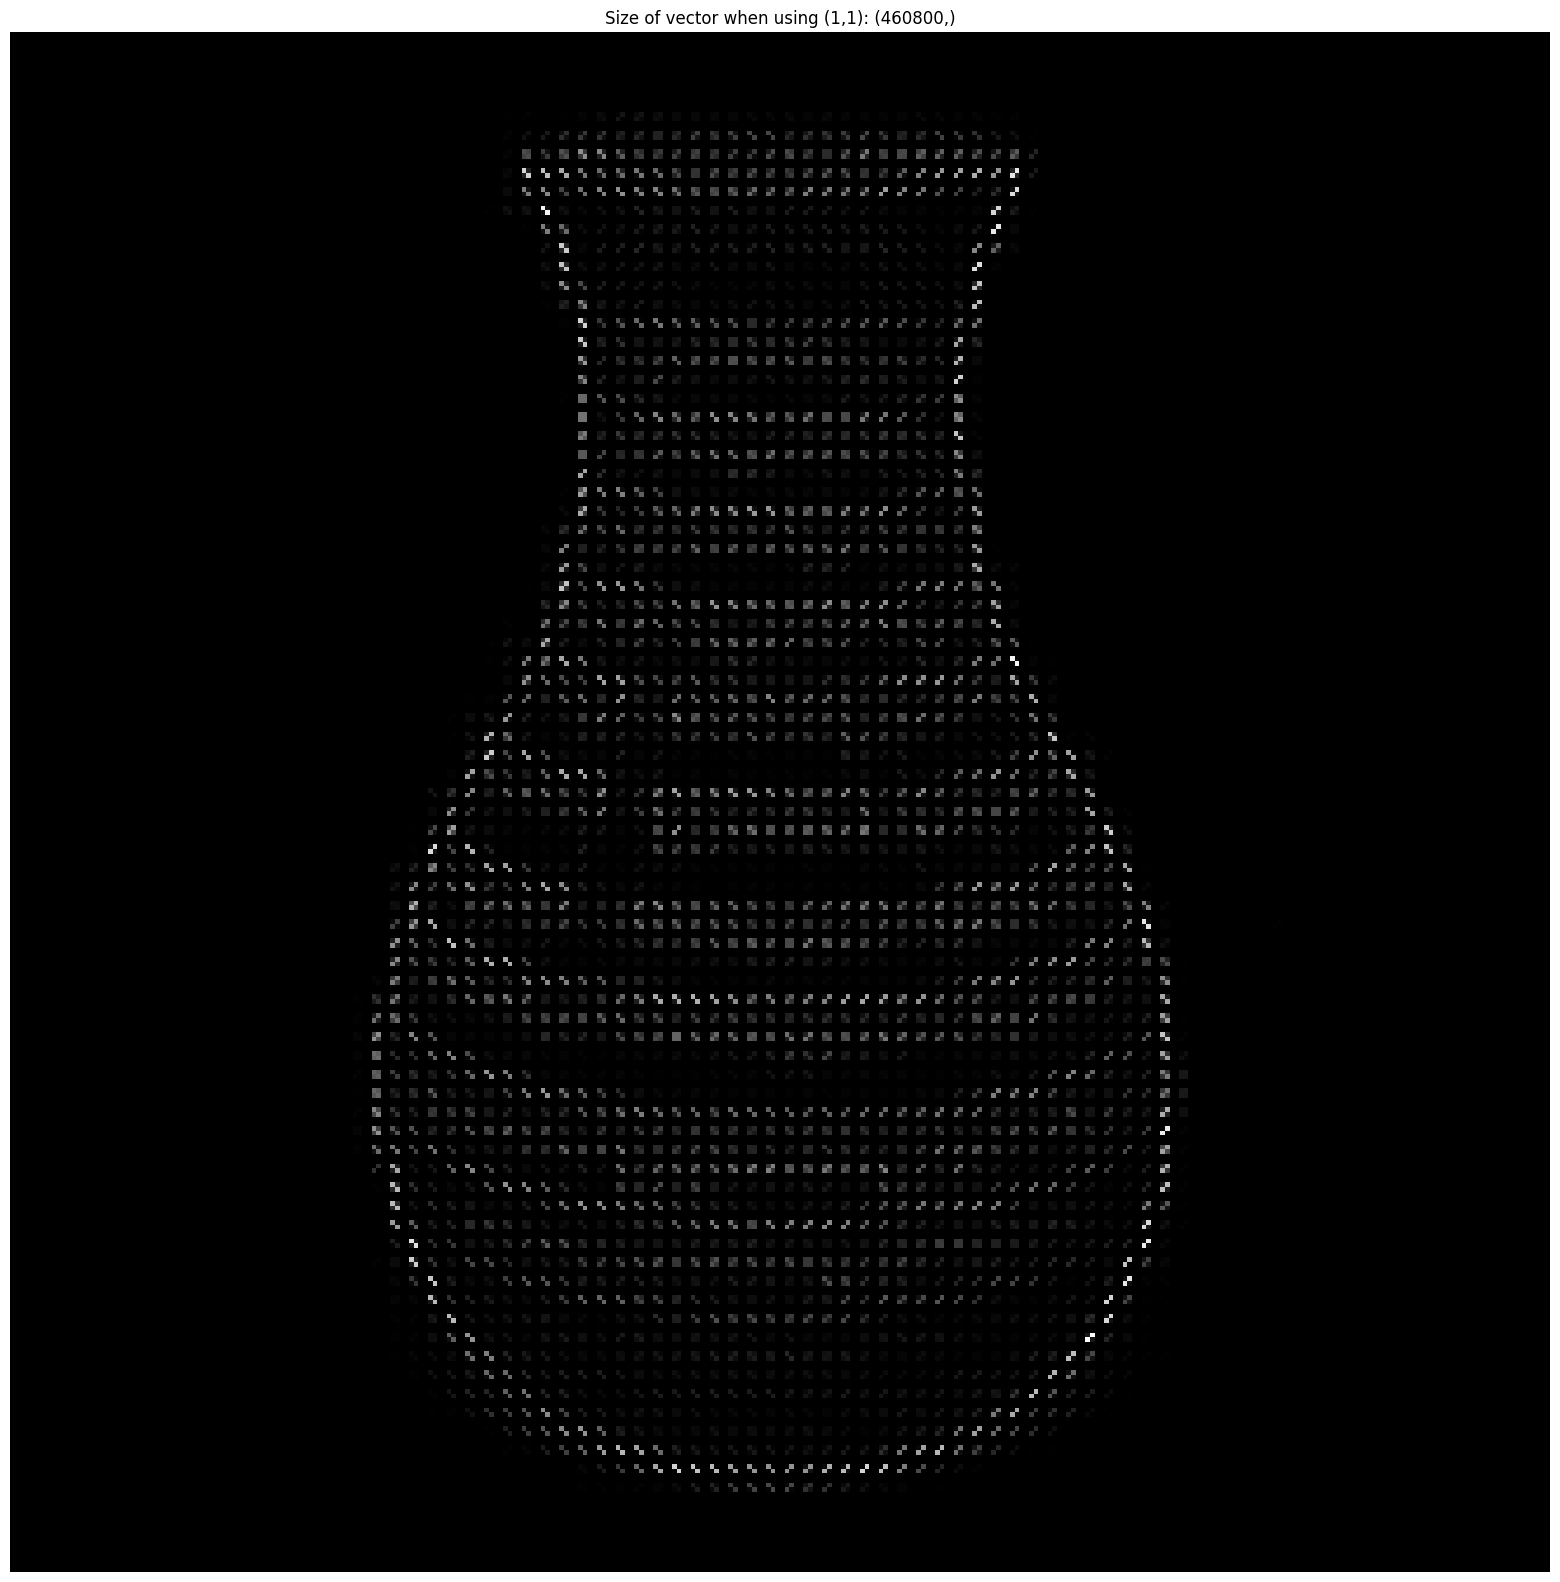

In [58]:
hog1, hogvis1 = skimage.feature.hog(image, pixels_per_cell=(32,32), visualize=True)
hog2, hogvis2 = skimage.feature.hog(image, pixels_per_cell=(16,16), visualize=True)
hog3, hogvis3 = skimage.feature.hog(image, pixels_per_cell=(2,2), visualize=True)
hog4, hogvis4 = skimage.feature.hog(image, pixels_per_cell=(4,4), visualize=True, orientations=8)

# Plot the various HoG results with differing cell sizes
plt.figure(figsize=figsize)
plt.imshow(hogvis1, cmap=plt.cm.gray)
plt.title(f'Size of vector when using (32,32): {hog1.shape}')
plt.axis('off')
plt.show()

plt.figure(figsize=figsize)
plt.imshow(hogvis2, cmap=plt.cm.gray)
plt.title(f'Size of vector when using (16,16): {hog2.shape}')
plt.axis('off')
plt.show()

plt.figure(figsize=figsize)
plt.imshow(hogvis3, cmap=plt.cm.gray)
plt.title(f'Size of vector when using (2,2): {hog3.shape}')
plt.axis('off')
plt.show()

plt.figure(figsize=figsize)
plt.imshow(hogvis4, cmap=plt.cm.gray)
plt.title(f'Size of vector when using (1,1): {hog4.shape}')
plt.axis('off')
plt.show()